<a href="https://colab.research.google.com/github/Saptasindhu07/Logistic-Regression/blob/main/Logistic_Regression_on_Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML Datasets/imbalanced_dataset.csv')
data

,feature1,feature2,target
0,-0.763451,-0.589101,0.0
1,-0.826250,0.099340,0.0
2,-1.138842,-0.496299,0.0
3,-0.627780,-0.159080,0.0
4,-0.918171,-0.163962,0.0
...,...,...,...
1241,-5.313332,-0.234108,0.0
1242,-6.986976,-0.243984,0.0
1243,-5.320644,-0.234108,0.0
1244,-6.996976,-0.243984,0.0


In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1244
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1245 non-null   float64
 1   feature2  1245 non-null   float64
 2   target    1245 non-null   float64
dtypes: float64(3)
memory usage: 38.9 KB


In [ ]:
X=data.iloc[:,0:2]
X

,feature1,feature2
0,-0.763451,-0.589101
1,-0.826250,0.099340
2,-1.138842,-0.496299
3,-0.627780,-0.159080
4,-0.918171,-0.163962
...,...,...
1240,-6.976976,-0.243984
1241,-5.313332,-0.234108
1242,-6.986976,-0.243984
1243,-5.320644,-0.234108


In [ ]:
y=data.iloc[:,2]
y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1240,0.0
1241,0.0
1242,0.0
1243,0.0


In [ ]:
from collections import Counter
counter=Counter(y)
print(counter)

Counter({0.0: 1244, 1.0: 1})


<Axes: xlabel='feature1', ylabel='feature2'>

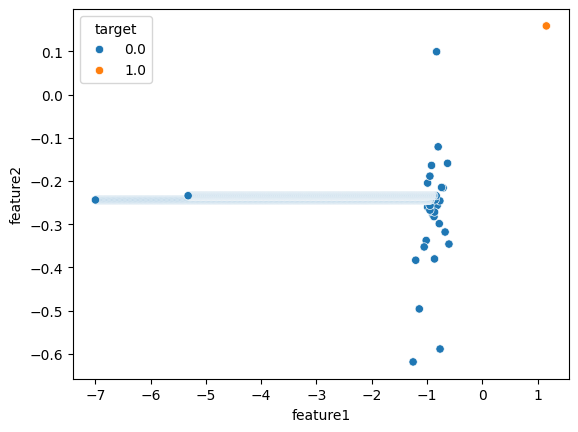

In [ ]:
sns.scatterplot(data=data,x='feature1',y='feature2',hue='target')

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3)

In [ ]:
class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [27]:
penalty=['l2']
cValues=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
params=dict(penalty=penalty,C=cValues,solver=solver,class_weight=class_weight)
params

{'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [28]:
logistic=LogisticRegression()
logistic.fit(X,y)


LogisticRegression()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [30]:
CV= StratifiedKFold()

In [31]:
grid= GridSearchCV(estimator=logistic,param_grid=params,scoring='accuracy',cv=CV,n_jobs=-1)
grid.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [32]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 1, 1: 1},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [33]:
y_pred= grid.predict(X_test)
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

1.0


array([[373,   0],
       [  0,   1]])